In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from sklearn.externals import joblib
%matplotlib inline
# import seaborn as sns
import gc

In [2]:
def reduce_mem_usage(data, verbose = True):
    start_mem = data.memory_usage().sum() / 1024**2
    if verbose:
        print('Memory usage of dataframe: {:.2f} MB'.format(start_mem))
    
    for col in data.columns:
        col_type = data[col].dtype
        
        if col_type != object:
            c_min = data[col].min()
            c_max = data[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    data[col] = data[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    data[col] = data[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    data[col] = data[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    data[col] = data[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    data[col] = data[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    data[col] = data[col].astype(np.float32)
                else:
                    data[col] = data[col].astype(np.float64)

    end_mem = data.memory_usage().sum() / 1024**2
    if verbose:
        print('Memory usage after optimization: {:.2f} MB'.format(end_mem))
        print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return data

# Application data EDA

In [3]:
app_train = reduce_mem_usage(pd.read_csv('./input/application_train.csv', nrows=None))
app_test = reduce_mem_usage(pd.read_csv('./input/application_test.csv', nrows=None))

X = app_train.append(app_test).reset_index().drop('index',axis=1)
X.head()

Memory usage of dataframe: 286.23 MB
Memory usage after optimization: 92.38 MB
Decreased by 67.7%
Memory usage of dataframe: 45.00 MB
Memory usage after optimization: 14.60 MB
Decreased by 67.6%


/home/lizihaoleo/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,TARGET,TOTALAREA_MODE,WALLSMATERIAL_MODE,WEEKDAY_APPR_PROCESS_START,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.014900,"Stone, brick",WEDNESDAY,0.972168,0.972168,0.972168,0.619141,0.624512,0.634277
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.071411,Block,MONDAY,0.984863,0.984863,0.984863,0.795898,0.798828,0.804199
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,MONDAY,NaN,NaN,NaN,NaN,NaN,NaN
3,29686.5,312682.5,297000.0,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,WEDNESDAY,NaN,NaN,NaN,NaN,NaN,NaN
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,THURSDAY,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
del app_train, app_test
gc.collect()

29

In [5]:
X_corr = abs(X.corr())
X_corr.sort_values('TARGET', ascending=False)['TARGET']

TARGET                         1.000000
EXT_SOURCE_3                   0.178918
EXT_SOURCE_2                   0.160471
EXT_SOURCE_1                   0.155318
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055219
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED                  0.044932
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
FLOORSMAX_AVG                  0.044005
FLOORSMAX_MEDI                 0.043769
FLOORSMAX_MODE                 0.043228
DAYS_REGISTRATION              0.041975
AMT_GOODS_PRICE                0.039645
OWN_CAR_AGE                    0.037612
REGION_POPULATION_RELATIVE     0.037231
ELEVATORS_AVG                  0.034199
ELEVATORS_MEDI                 0.033863
FLOORSMIN_AVG                  0.033615
FLOORSMIN_MEDI                 0.033396


In [6]:
# Replace some outliers
X['DAYS_EMPLOYED'].replace(365243, np.nan, inplace = True)
X.loc[X['OWN_CAR_AGE'] > 80, 'OWN_CAR_AGE'] = np.nan
X.loc[X['REGION_RATING_CLIENT_W_CITY'] < 0, 'REGION_RATING_CLIENT_W_CITY'] = np.nan
X.loc[X['AMT_INCOME_TOTAL'] > 1e8, 'AMT_INCOME_TOTAL'] = np.nan
X.loc[X['AMT_REQ_CREDIT_BUREAU_QRT'] > 10, 'AMT_REQ_CREDIT_BUREAU_QRT'] = np.nan
X.loc[X['OBS_30_CNT_SOCIAL_CIRCLE'] > 40, 'OBS_30_CNT_SOCIAL_CIRCLE'] = np.nan
X['CODE_GENDER'].replace('XNA',np.nan, inplace=True)
X['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)
X['NAME_FAMILY_STATUS'].replace('Unknown', np.nan, inplace=True)
X['ORGANIZATION_TYPE'].replace('XNA', np.nan, inplace=True)

In [7]:
# Remove some empty features
X.drop(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 
        'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 
        'FLAG_DOCUMENT_21'], axis = 1, inplace = True)

In [8]:
X['app annuity_income_percentage'] = X['AMT_ANNUITY'] / X['AMT_INCOME_TOTAL']
X['app car_to_birth_ratio'] = X['OWN_CAR_AGE'] / X['DAYS_BIRTH']
X['app car_to_employ_ratio'] = X['OWN_CAR_AGE'] / X['DAYS_EMPLOYED']
X['app children_ratio'] = X['CNT_CHILDREN'] / X['CNT_FAM_MEMBERS']
X['app credit_to_annuity_ratio'] = X['AMT_CREDIT'] / X['AMT_ANNUITY']
X['app credit_to_goods_ratio'] = X['AMT_CREDIT'] / X['AMT_GOODS_PRICE']
X['app credit_to_income_ratio'] = X['AMT_CREDIT'] / X['AMT_INCOME_TOTAL']
X['app days_employed_percentage'] = X['DAYS_EMPLOYED'] / X['DAYS_BIRTH']
X['app income_credit_percentage'] = X['AMT_INCOME_TOTAL'] / X['AMT_CREDIT']
X['app income_per_child'] = X['AMT_INCOME_TOTAL'] / (1 + X['CNT_CHILDREN'])
X['app income_per_person'] = X['AMT_INCOME_TOTAL'] / X['CNT_FAM_MEMBERS']
X['app payment_rate'] = X['AMT_ANNUITY'] / X['AMT_CREDIT']
X['app phone_to_birth_ratio'] = X['DAYS_LAST_PHONE_CHANGE'] / X['DAYS_BIRTH']
X['app phone_to_employ_ratio'] = X['DAYS_LAST_PHONE_CHANGE'] / X['DAYS_EMPLOYED']
X['app cnt_non_child'] = X['CNT_FAM_MEMBERS'] - X['CNT_CHILDREN']
X['app child_to_non_child_ratio'] = X['CNT_CHILDREN'] / X['app cnt_non_child']
X['app income_per_non_child'] = X['AMT_INCOME_TOTAL'] / X['app cnt_non_child']
X['app credit_per_person'] = X['AMT_CREDIT'] / X['CNT_FAM_MEMBERS']
X['app credit_per_child'] = X['AMT_CREDIT'] / (1 + X['CNT_CHILDREN'])
X['app credit_per_non_child'] = X['AMT_CREDIT'] / X['app cnt_non_child']
X['app short_employment'] = (X['DAYS_EMPLOYED'] < -2000).astype(int)
X['app young_age'] = (X['DAYS_BIRTH'] < -14000).astype(int)

X['app EXT_SOURCE prod'] = X['EXT_SOURCE_1'] * X['EXT_SOURCE_2'] * X['EXT_SOURCE_3']
X['app EXT_SOURCE_1 * EXT_SOURCE_2'] = X['EXT_SOURCE_1'] * X['EXT_SOURCE_2']
X['app EXT_SOURCE_1 * EXT_SOURCE_3'] = X['EXT_SOURCE_1'] * X['EXT_SOURCE_3']
X['app EXT_SOURCE_2 * EXT_SOURCE_3'] = X['EXT_SOURCE_2'] * X['EXT_SOURCE_3']
X['app EXT_SOURCE_1 * DAYS_EMPLOYED'] = X['EXT_SOURCE_1'] * X['DAYS_EMPLOYED']
X['app EXT_SOURCE_2 * DAYS_EMPLOYED'] = X['EXT_SOURCE_2'] * X['DAYS_EMPLOYED']
X['app EXT_SOURCE_3 * DAYS_EMPLOYED'] = X['EXT_SOURCE_3'] * X['DAYS_EMPLOYED']
X['app EXT_SOURCE_1 / DAYS_BIRTH'] = X['EXT_SOURCE_1'] / X['DAYS_BIRTH']
X['app EXT_SOURCE_2 / DAYS_BIRTH'] = X['EXT_SOURCE_2'] / X['DAYS_BIRTH']
X['app EXT_SOURCE_3 / DAYS_BIRTH'] = X['EXT_SOURCE_3'] / X['DAYS_BIRTH']

X['app AMT_CREDIT - AMT_GOODS_PRICE'] = X['AMT_CREDIT'] - X['AMT_GOODS_PRICE']
X['app AMT_INCOME_TOTAL / 12 - AMT_ANNUITY'] = X['AMT_INCOME_TOTAL'] / 12. - X['AMT_ANNUITY']
X['app AMT_INCOME_TOTAL / AMT_ANNUITY'] = X['AMT_INCOME_TOTAL'] / X['AMT_ANNUITY']
X['app AMT_INCOME_TOTAL - AMT_GOODS_PRICE'] = X['AMT_INCOME_TOTAL'] - X['AMT_GOODS_PRICE']
X['app most popular AMT_GOODS_PRICE'] = X['AMT_GOODS_PRICE'] \
                    .isin([225000, 450000, 675000, 900000]).map({True: 1, False: 0})
X['app popular AMT_GOODS_PRICE'] = X['AMT_GOODS_PRICE'] \
                    .isin([1125000, 1350000, 1575000, 1800000, 2250000]).map({True: 1, False: 0})
X['app DAYS_EMPLOYED - DAYS_BIRTH'] = X['DAYS_EMPLOYED'] - X['DAYS_BIRTH']

In [9]:
# External sources
X['app external_sources_weighted'] = X.EXT_SOURCE_1 * 2 + X.EXT_SOURCE_2 * 3 + X.EXT_SOURCE_3 * 4
for function_name in ['min', 'max', 'sum', 'mean', 'nanmedian']:
    X['app external_sources_{}'.format(function_name)] = eval('np.{}'.format(function_name))(
        X[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']], axis=1)
#     print('external_sources_{}'.format(function_name))

/home/lizihaoleo/anaconda3/lib/python3.6/site-packages/pandas/core/nanops.py:121: RuntimeWarning: Mean of empty slice
  result = bn_func(values, axis=axis, **kwds)
/home/lizihaoleo/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


In [10]:
engineered_numerical_columns  = [x for x in list(X.columns) if 'app' in x]

In [11]:
X_eng = X[engineered_numerical_columns + ['TARGET']]
X_eng_corr = abs(X_eng.corr())
X_eng_corr.sort_values('TARGET', ascending=False)['TARGET']

TARGET                                     1.000000
app external_sources_weighted              0.236287
app external_sources_mean                  0.222052
app external_sources_nanmedian             0.218118
app EXT_SOURCE_2 * EXT_SOURCE_3            0.199486
app external_sources_max                   0.196873
app EXT_SOURCE prod                        0.188552
app EXT_SOURCE_1 * EXT_SOURCE_3            0.187833
app external_sources_min                   0.185267
app EXT_SOURCE_1 * EXT_SOURCE_2            0.175574
app external_sources_sum                   0.173322
app EXT_SOURCE_1 / DAYS_BIRTH              0.142095
app EXT_SOURCE_3 / DAYS_BIRTH              0.115915
app EXT_SOURCE_3 * DAYS_EMPLOYED           0.110831
app EXT_SOURCE_2 * DAYS_EMPLOYED           0.105509
app EXT_SOURCE_2 / DAYS_BIRTH              0.093065
app EXT_SOURCE_1 * DAYS_EMPLOYED           0.090050
app credit_to_goods_ratio                  0.069427
app days_employed_percentage               0.067955
app young_ag

In [12]:
AGGREGATION_RECIPIES  = [
    (['CODE_GENDER', 'NAME_EDUCATION_TYPE'], [('AMT_ANNUITY', 'max'),
                                              ('AMT_CREDIT', 'max'),
                                              ('EXT_SOURCE_1', 'mean'),
                                              ('EXT_SOURCE_2', 'mean'),
                                              ('OWN_CAR_AGE', 'max'),
                                              ('OWN_CAR_AGE', 'sum')]),
    (['CODE_GENDER', 'ORGANIZATION_TYPE'], [('AMT_ANNUITY', 'mean'),
                                            ('AMT_INCOME_TOTAL', 'mean'),
                                            ('DAYS_REGISTRATION', 'mean'),
                                            ('EXT_SOURCE_1', 'mean')]),
    (['CODE_GENDER', 'REG_CITY_NOT_WORK_CITY'], [('AMT_ANNUITY', 'mean'),
                                                 ('CNT_CHILDREN', 'mean'),
                                                 ('DAYS_ID_PUBLISH', 'mean')]),
    (['CODE_GENDER', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'REG_CITY_NOT_WORK_CITY'], [('EXT_SOURCE_1', 'mean'),
                                                                                           ('EXT_SOURCE_2', 'mean')]),
    (['NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE'], [('AMT_CREDIT', 'mean'),
                                                  ('AMT_REQ_CREDIT_BUREAU_YEAR', 'mean'),
                                                  ('APARTMENTS_AVG', 'mean'),
                                                  ('BASEMENTAREA_AVG', 'mean'),
                                                  ('EXT_SOURCE_1', 'mean'),
                                                  ('EXT_SOURCE_2', 'mean'),
                                                  ('EXT_SOURCE_3', 'mean'),
                                                  ('NONLIVINGAREA_AVG', 'mean'),
                                                  ('OWN_CAR_AGE', 'mean'),
                                                  ('YEARS_BUILD_AVG', 'mean')]),
    (['NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'REG_CITY_NOT_WORK_CITY'], [('ELEVATORS_AVG', 'mean'),
                                                                            ('EXT_SOURCE_1', 'mean')]),
    (['OCCUPATION_TYPE'], [('AMT_ANNUITY', 'mean'),
                           ('CNT_CHILDREN', 'mean'),
                           ('CNT_FAM_MEMBERS', 'mean'),
                           ('DAYS_BIRTH', 'mean'),
                           ('DAYS_EMPLOYED', 'mean'),
                           ('DAYS_ID_PUBLISH', 'mean'),
                           ('DAYS_REGISTRATION', 'mean'),
                           ('EXT_SOURCE_1', 'mean'),
                           ('EXT_SOURCE_2', 'mean'),
                           ('EXT_SOURCE_3', 'mean')]),
]

In [13]:
groupby_aggregate_names  = []
for groupby_cols, specs in tqdm(AGGREGATION_RECIPIES):
    group_object = X.groupby(groupby_cols)
    for select, agg in specs:
        groupby_aggregate_name = '{}_{}_{}'.format('_'.join(groupby_cols), agg, select)
        X = X.merge(group_object[select]
                              .agg(agg)
                              .reset_index()
                              .rename(index=str,
                                      columns={select: groupby_aggregate_name})
                              [groupby_cols + [groupby_aggregate_name]],
                              on=groupby_cols,
                              how='left')
        groupby_aggregate_names.append(groupby_aggregate_name)

In [14]:
groupby_aggregate_names

['CODE_GENDER_NAME_EDUCATION_TYPE_max_AMT_ANNUITY',
 'CODE_GENDER_NAME_EDUCATION_TYPE_max_AMT_CREDIT',
 'CODE_GENDER_NAME_EDUCATION_TYPE_mean_EXT_SOURCE_1',
 'CODE_GENDER_NAME_EDUCATION_TYPE_mean_EXT_SOURCE_2',
 'CODE_GENDER_NAME_EDUCATION_TYPE_max_OWN_CAR_AGE',
 'CODE_GENDER_NAME_EDUCATION_TYPE_sum_OWN_CAR_AGE',
 'CODE_GENDER_ORGANIZATION_TYPE_mean_AMT_ANNUITY',
 'CODE_GENDER_ORGANIZATION_TYPE_mean_AMT_INCOME_TOTAL',
 'CODE_GENDER_ORGANIZATION_TYPE_mean_DAYS_REGISTRATION',
 'CODE_GENDER_ORGANIZATION_TYPE_mean_EXT_SOURCE_1',
 'CODE_GENDER_REG_CITY_NOT_WORK_CITY_mean_AMT_ANNUITY',
 'CODE_GENDER_REG_CITY_NOT_WORK_CITY_mean_CNT_CHILDREN',
 'CODE_GENDER_REG_CITY_NOT_WORK_CITY_mean_DAYS_ID_PUBLISH',
 'CODE_GENDER_NAME_EDUCATION_TYPE_OCCUPATION_TYPE_REG_CITY_NOT_WORK_CITY_mean_EXT_SOURCE_1',
 'CODE_GENDER_NAME_EDUCATION_TYPE_OCCUPATION_TYPE_REG_CITY_NOT_WORK_CITY_mean_EXT_SOURCE_2',
 'NAME_EDUCATION_TYPE_OCCUPATION_TYPE_mean_AMT_CREDIT',
 'NAME_EDUCATION_TYPE_OCCUPATION_TYPE_mean_AMT_REQ_CRE

In [15]:
X_agg = X[groupby_aggregate_names + ['TARGET']]
X_agg_corr = abs(X_agg.corr())
X_agg_corr.sort_values('TARGET', ascending=False)['TARGET']

TARGET                                                                                      1.000000
NAME_EDUCATION_TYPE_OCCUPATION_TYPE_REG_CITY_NOT_WORK_CITY_mean_EXT_SOURCE_1                0.090223
CODE_GENDER_NAME_EDUCATION_TYPE_OCCUPATION_TYPE_REG_CITY_NOT_WORK_CITY_mean_EXT_SOURCE_2    0.089537
CODE_GENDER_NAME_EDUCATION_TYPE_OCCUPATION_TYPE_REG_CITY_NOT_WORK_CITY_mean_EXT_SOURCE_1    0.086755
NAME_EDUCATION_TYPE_OCCUPATION_TYPE_mean_EXT_SOURCE_1                                       0.083730
NAME_EDUCATION_TYPE_OCCUPATION_TYPE_mean_EXT_SOURCE_2                                       0.082765
NAME_EDUCATION_TYPE_OCCUPATION_TYPE_REG_CITY_NOT_WORK_CITY_mean_ELEVATORS_AVG               0.078334
OCCUPATION_TYPE_mean_EXT_SOURCE_1                                                           0.076785
NAME_EDUCATION_TYPE_OCCUPATION_TYPE_mean_NONLIVINGAREA_AVG                                  0.075570
NAME_EDUCATION_TYPE_OCCUPATION_TYPE_mean_AMT_REQ_CREDIT_BUREAU_YEAR                        

### Diff features

In [16]:
diff_feature_names = []
for groupby_cols, specs in tqdm(AGGREGATION_RECIPIES):
    for select, agg in (specs):
        if agg in ['mean','median','max','min']:
            groupby_aggregate_name = '{}_{}_{}'.format('_'.join(groupby_cols), agg, select)
            diff_name = '{}_diff'.format(groupby_aggregate_name)
            abs_diff_name = '{}_abs_diff'.format(groupby_aggregate_name)

            X[diff_name] = X[select] - X[groupby_aggregate_name] 
            X[abs_diff_name] = np.abs(X[select] - X[groupby_aggregate_name]) 

            diff_feature_names.append(diff_name)
            diff_feature_names.append(abs_diff_name)

In [17]:
X_diff  =  X[diff_feature_names  + ['TARGET']]
X_diff_corr = abs(X_diff.corr())
X_diff_corr.sort_values('TARGET', ascending=False)['TARGET']

TARGET                                                                                               1.000000
NAME_EDUCATION_TYPE_OCCUPATION_TYPE_mean_EXT_SOURCE_3_diff                                           0.181002
OCCUPATION_TYPE_mean_EXT_SOURCE_3_diff                                                               0.180467
OCCUPATION_TYPE_mean_EXT_SOURCE_2_diff                                                               0.163093
NAME_EDUCATION_TYPE_OCCUPATION_TYPE_mean_EXT_SOURCE_2_diff                                           0.159975
CODE_GENDER_NAME_EDUCATION_TYPE_OCCUPATION_TYPE_REG_CITY_NOT_WORK_CITY_mean_EXT_SOURCE_2_diff        0.157524
CODE_GENDER_NAME_EDUCATION_TYPE_mean_EXT_SOURCE_2_diff                                               0.153565
CODE_GENDER_ORGANIZATION_TYPE_mean_EXT_SOURCE_1_diff                                                 0.147369
CODE_GENDER_NAME_EDUCATION_TYPE_mean_EXT_SOURCE_1_diff                                               0.142476
OCCUPATION

### Age

In [19]:
# sns.distplot(X['DAYS_BIRTH'])

In [20]:
X['retirement_age'] = (X['DAYS_BIRTH'] > -14000).astype(int)
feature_names = ['retirement_age']
X_age = X[feature_names +['DAYS_BIRTH'] + ['TARGET']]
X_age_corr = abs(X_age.corr())
X_age_corr.sort_values('TARGET', ascending=False)['TARGET']

TARGET            1.000000
DAYS_BIRTH        0.078239
retirement_age    0.067583
Name: TARGET, dtype: float64

# Bureau and Balance EDA

In [21]:
bureau_balance = \
reduce_mem_usage(pd.read_csv('./input/bureau_balance.csv'), verbose = True)

Memory usage of dataframe: 624.85 MB
Memory usage after optimization: 338.46 MB
Decreased by 45.8%


In [22]:
tmp = bureau_balance[['SK_ID_BUREAU', 'STATUS']].groupby('SK_ID_BUREAU')
tmp_last = tmp.last()
tmp_last.columns = ['First_status']
bureau_balance = bureau_balance.join(tmp_last, how = 'left', on = 'SK_ID_BUREAU')
tmp_first = tmp.first()
tmp_first.columns = ['Last_status']
bureau_balance = bureau_balance.join(tmp_first, how = 'left', on = 'SK_ID_BUREAU')
del tmp, tmp_first, tmp_last
gc.collect()

112

In [23]:
tmp = bureau_balance[['SK_ID_BUREAU', 'MONTHS_BALANCE']].groupby('SK_ID_BUREAU').last()
tmp = tmp.apply(abs)
tmp.columns = ['Month']
bureau_balance = bureau_balance.join(tmp, how = 'left', on = 'SK_ID_BUREAU')
del tmp
gc.collect()

21

In [24]:
tmp = bureau_balance.loc[bureau_balance['STATUS'] == 'C', ['SK_ID_BUREAU', 'MONTHS_BALANCE']] \
            .groupby('SK_ID_BUREAU').last()
tmp = tmp.apply(abs)
tmp.columns = ['When_closed']
bureau_balance = bureau_balance.join(tmp, how = 'left', on = 'SK_ID_BUREAU')
del tmp
gc.collect()

28

In [25]:
bureau_balance['Month_closed_to_end'] = bureau_balance['Month'] - bureau_balance['When_closed']

for c in tqdm(range(6)):
    tmp = bureau_balance.loc[bureau_balance['STATUS'] == str(c), ['SK_ID_BUREAU', 'MONTHS_BALANCE']] \
                        .groupby('SK_ID_BUREAU').count()
    tmp.columns = ['DPD_' + str(c) + '_cnt']
    bureau_balance = bureau_balance.join(tmp, how = 'left', on = 'SK_ID_BUREAU')
    bureau_balance['DPD_' + str(c) + ' / Month'] = bureau_balance['DPD_' + str(c) + '_cnt'] / bureau_balance['Month']
    del tmp
    gc.collect()
bureau_balance['Non_zero_DPD_cnt'] = bureau_balance[['DPD_1_cnt', 'DPD_2_cnt', 'DPD_3_cnt', 'DPD_4_cnt', 'DPD_5_cnt']].sum(axis = 1)

In [26]:
def one_hot_encoder(data, nan_as_category = True):
    original_columns = list(data.columns)
    categorical_columns = [col for col in data.columns \
                           if not pd.api.types.is_numeric_dtype(data[col].dtype)]
    for c in categorical_columns:
        if nan_as_category:
            data[c].fillna('NaN', inplace = True)
        values = list(data[c].unique())
        for v in values:
            data[str(c) + '_' + str(v)] = (data[c] == v).astype(np.uint8)
    data.drop(categorical_columns, axis = 1, inplace = True)
    return data, [c for c in data.columns if c not in original_columns]

In [27]:
bureau_balance, bureau_b_cat = one_hot_encoder(bureau_balance)

# Bureau balance: Perform aggregations 
aggregations = {}
for col in tqdm(bureau_balance.columns):
    aggregations[col] = ['mean'] if col in bureau_b_cat else ['min', 'max', 'size']
bureau_balance_agg = bureau_balance.groupby('SK_ID_BUREAU').agg(aggregations)
bureau_balance_agg.columns = pd.Index(["bb_" + e[0] + "_" + e[1].upper() for e in bureau_balance_agg.columns.tolist()])
del bureau_balance
gc.collect()

57

In [28]:
bureau_balance_agg = bureau_balance_agg.drop(['bb_SK_ID_BUREAU_MIN','bb_SK_ID_BUREAU_MAX'],axis=1)
bureau_balance_agg.head()

,bb_SK_ID_BUREAU_SIZE,bb_MONTHS_BALANCE_MIN,bb_MONTHS_BALANCE_MAX,bb_MONTHS_BALANCE_SIZE,bb_Month_MIN,bb_Month_MAX,bb_Month_SIZE,bb_When_closed_MIN,bb_When_closed_MAX,bb_When_closed_SIZE,...,bb_First_status_2_MEAN,bb_First_status_3_MEAN,bb_Last_status_C_MEAN,bb_Last_status_X_MEAN,bb_Last_status_0_MEAN,bb_Last_status_1_MEAN,bb_Last_status_2_MEAN,bb_Last_status_5_MEAN,bb_Last_status_3_MEAN,bb_Last_status_4_MEAN
SK_ID_BUREAU,,,,,,,,,,,,,,,,,,,,,
5001709,97,-96,0,97,96,96,97,85.0,85.0,97,...,0,0,1,0,0,0,0,0,0,0
5001710,83,-82,0,83,82,82,83,47.0,47.0,83,...,0,0,1,0,0,0,0,0,0,0
5001711,4,-3,0,4,3,3,4,NaN,NaN,4,...,0,0,0,1,0,0,0,0,0,0
5001712,19,-18,0,19,18,18,19,8.0,8.0,19,...,0,0,1,0,0,0,0,0,0,0
5001713,22,-21,0,22,21,21,22,NaN,NaN,22,...,0,0,0,1,0,0,0,0,0,0


# Bureau data EDA

In [29]:
bureau = \
reduce_mem_usage(pd.read_csv('./input/bureau.csv'), verbose = True)

Memory usage of dataframe: 222.62 MB
Memory usage after optimization: 112.95 MB
Decreased by 49.3%


In [30]:
# Replace\remove some outliers in bureau set
bureau.loc[bureau['AMT_ANNUITY'] > .8e8, 'AMT_ANNUITY'] = np.nan
bureau.loc[bureau['AMT_CREDIT_SUM'] > 3e8, 'AMT_CREDIT_SUM'] = np.nan
bureau.loc[bureau['AMT_CREDIT_SUM_DEBT'] > 1e8, 'AMT_CREDIT_SUM_DEBT'] = np.nan
bureau.loc[bureau['AMT_CREDIT_MAX_OVERDUE'] > .8e8, 'AMT_CREDIT_MAX_OVERDUE'] = np.nan
bureau.loc[bureau['DAYS_ENDDATE_FACT'] < -10000, 'DAYS_ENDDATE_FACT'] = np.nan
bureau.loc[(bureau['DAYS_CREDIT_UPDATE'] > 0) | (bureau['DAYS_CREDIT_UPDATE'] < -40000), 'DAYS_CREDIT_UPDATE'] = np.nan
bureau.loc[bureau['DAYS_CREDIT_ENDDATE'] < -10000, 'DAYS_CREDIT_ENDDATE'] = np.nan
bureau.drop(bureau[bureau['DAYS_ENDDATE_FACT'] < bureau['DAYS_CREDIT']].index, inplace = True)

In [31]:
bureau['AMT_CREDIT_SUM'].fillna(0, inplace=True)
bureau['AMT_CREDIT_SUM_DEBT'].fillna(0, inplace=True)
bureau['AMT_CREDIT_SUM_OVERDUE'].fillna(0, inplace=True)
bureau['CNT_CREDIT_PROLONG'].fillna(0, inplace=True)

In [32]:
# Some new features in bureau set
bureau['bureau AMT_CREDIT_SUM - AMT_CREDIT_SUM_DEBT'] = bureau['AMT_CREDIT_SUM'] - bureau['AMT_CREDIT_SUM_DEBT']
bureau['bureau AMT_CREDIT_SUM - AMT_CREDIT_SUM_LIMIT'] = bureau['AMT_CREDIT_SUM'] - bureau['AMT_CREDIT_SUM_LIMIT']
bureau['bureau AMT_CREDIT_SUM - AMT_CREDIT_SUM_OVERDUE'] = bureau['AMT_CREDIT_SUM'] - bureau['AMT_CREDIT_SUM_OVERDUE']

bureau['bureau DAYS_CREDIT - CREDIT_DAY_OVERDUE'] = bureau['DAYS_CREDIT'] - bureau['CREDIT_DAY_OVERDUE']
bureau['bureau DAYS_CREDIT - DAYS_CREDIT_ENDDATE'] = bureau['DAYS_CREDIT'] - bureau['DAYS_CREDIT_ENDDATE']
bureau['bureau DAYS_CREDIT - DAYS_ENDDATE_FACT'] = bureau['DAYS_CREDIT'] - bureau['DAYS_ENDDATE_FACT']
bureau['bureau DAYS_CREDIT_ENDDATE - DAYS_ENDDATE_FACT'] = bureau['DAYS_CREDIT_ENDDATE'] - bureau['DAYS_ENDDATE_FACT']
bureau['bureau DAYS_CREDIT_UPDATE - DAYS_CREDIT_ENDDATE'] = bureau['DAYS_CREDIT_UPDATE'] - bureau['DAYS_CREDIT_ENDDATE']

In [33]:
# Bureau balance: merge with bureau.csv
bureau = bureau.join(bureau_balance_agg, how = 'left', on = 'SK_ID_BUREAU')
bureau.drop('SK_ID_BUREAU', axis = 1, inplace = True)
del bureau_balance_agg
gc.collect()

36

In [34]:
bureau[bureau['SK_ID_CURR']==215354]

,SK_ID_CURR,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,...,bb_First_status_2_MEAN,bb_First_status_3_MEAN,bb_Last_status_C_MEAN,bb_Last_status_X_MEAN,bb_Last_status_0_MEAN,bb_Last_status_1_MEAN,bb_Last_status_2_MEAN,bb_Last_status_5_MEAN,bb_Last_status_3_MEAN,bb_Last_status_4_MEAN
0,215354,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,9.132300e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,215354,Active,currency 1,-208,0,1075.0,NaN,NaN,0,2.250000e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,215354,Active,currency 1,-203,0,528.0,NaN,NaN,0,4.643235e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,215354,Active,currency 1,-203,0,NaN,NaN,NaN,0,9.000000e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,215354,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2.700000e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,215354,Active,currency 1,-273,0,27456.0,NaN,0.0,0,1.800000e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,215354,Active,currency 1,-43,0,79.0,NaN,0.0,0,4.210380e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225157,215354,Closed,currency 1,-1872,0,-776.0,-1203.0,NaN,0,4.945500e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225158,215354,Closed,currency 1,-1734,0,-638.0,-1336.0,NaN,0,1.084032e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225159,215354,Closed,currency 1,-1333,0,-1089.0,-987.0,NaN,0,1.021500e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
bureau['bureau_credit_active_binary'] = (bureau['CREDIT_ACTIVE'] != 'Closed').astype(int)
bureau['bureau_credit_enddate_binary'] = (bureau['DAYS_CREDIT_ENDDATE'] > 0).astype(int)

groupby_SK_ID_CURR = bureau.groupby(by=['SK_ID_CURR'])

In [36]:
# AGGREGATION_RECIPIES = select, aggregate, rename
AGGREGATION_RECIPIES  = [
    ('DAYS_CREDIT','count','bureau_number_of_past_loans'),
    ('CREDIT_TYPE','nunique','bureau_number_of_loan_types'),
    ('bureau_credit_active_binary','mean','bureau_credit_active_percentage'),
    ('AMT_CREDIT_SUM_DEBT','sum','bureau_total_customer_debt'),
    ('AMT_CREDIT_SUM_OVERDUE','sum','bureau_total_customer_overdue'),
    ('AMT_CREDIT_SUM','sum','bureau_total_customer_credit'),
    ('CNT_CREDIT_PROLONG','sum','bureau_average_creditdays_prolonged'),
    ('bureau_credit_enddate_binary','mean','bureau_credit_enddate_percentage')
]

In [37]:
features = pd.DataFrame({'SK_ID_CURR':bureau['SK_ID_CURR'].unique()})
for select, aggregate, rename in tqdm(AGGREGATION_RECIPIES):
    group_object = groupby_SK_ID_CURR[select].agg(aggregate).reset_index()
    group_object.rename(index=str, columns={select: rename},inplace=True)
    features = features.merge(group_object, on=['SK_ID_CURR'], how='left')
features.head()

,SK_ID_CURR,bureau_number_of_past_loans,bureau_number_of_loan_types,bureau_credit_active_percentage,bureau_total_customer_debt,bureau_total_customer_overdue,bureau_total_customer_credit,bureau_average_creditdays_prolonged,bureau_credit_enddate_percentage
0,215354,11,3,0.545455,2.844632e+05,0.0,5973945.5,0,0.454545
1,162297,6,3,0.500000,0.000000e+00,0.0,8230386.0,0,0.166667
2,402440,1,1,1.000000,7.690500e+04,0.0,89910.0,0,1.000000
3,238881,8,2,0.375000,5.527305e+05,0.0,1285239.0,0,0.125000
4,222183,8,3,0.625000,1.185082e+06,0.0,7158960.0,0,0.625000


In [38]:
features['bureau_average_of_past_loans_per_type'] = \
    features['bureau_number_of_past_loans'] / features['bureau_number_of_loan_types']
features['bureau_debt_credit_ratio'] = \
    features['bureau_total_customer_debt'] / features['bureau_total_customer_credit']
features['bureau_overdue_debt_ratio'] = \
    features['bureau_total_customer_overdue'] / features['bureau_total_customer_debt']
features.head()

,SK_ID_CURR,bureau_number_of_past_loans,bureau_number_of_loan_types,bureau_credit_active_percentage,bureau_total_customer_debt,bureau_total_customer_overdue,bureau_total_customer_credit,bureau_average_creditdays_prolonged,bureau_credit_enddate_percentage,bureau_average_of_past_loans_per_type,bureau_debt_credit_ratio,bureau_overdue_debt_ratio
0,215354,11,3,0.545455,2.844632e+05,0.0,5973945.5,0,0.454545,3.666667,0.047617,0.0
1,162297,6,3,0.500000,0.000000e+00,0.0,8230386.0,0,0.166667,2.000000,0.000000,NaN
2,402440,1,1,1.000000,7.690500e+04,0.0,89910.0,0,1.000000,1.000000,0.855355,0.0
3,238881,8,2,0.375000,5.527305e+05,0.0,1285239.0,0,0.125000,4.000000,0.430060,0.0
4,222183,8,3,0.625000,1.185082e+06,0.0,7158960.0,0,0.625000,2.666667,0.165538,0.0


In [39]:
# print(X.shape)
X = X.merge(features,
            left_on=['SK_ID_CURR'],
            right_on=['SK_ID_CURR'],
            how='left',
            validate='one_to_one')
# print(X.shape)
X.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,bureau_number_of_loan_types,bureau_credit_active_percentage,bureau_total_customer_debt,bureau_total_customer_overdue,bureau_total_customer_credit,bureau_average_creditdays_prolonged,bureau_credit_enddate_percentage,bureau_average_of_past_loans_per_type,bureau_debt_credit_ratio,bureau_overdue_debt_ratio
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,0.25,245781.0,0.0,8.650556e+05,0.0,0.375,4.0,0.284122,0.0
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.25,0.0,0.0,1.017400e+06,0.0,0.250,2.0,0.000000,NaN
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.00,0.0,0.0,1.890378e+05,0.0,0.000,2.0,0.000000,NaN
3,29686.5,312682.5,297000.0,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.00,0.0,0.0,1.462500e+05,0.0,0.000,1.0,0.000000,NaN


In [40]:
engineered_numerical_columns = list(features.columns)
engineered_numerical_columns.remove('SK_ID_CURR')
bureau_eng = X[engineered_numerical_columns + ['TARGET']]
bureau_eng_corr = abs(bureau_eng.corr())

In [41]:
bureau_eng_corr.sort_values('TARGET', ascending=False)['TARGET']

TARGET                                   1.000000
bureau_credit_active_percentage          0.079374
bureau_debt_credit_ratio                 0.060232
bureau_credit_enddate_percentage         0.055299
bureau_total_customer_credit             0.014196
bureau_total_customer_overdue            0.013335
bureau_total_customer_debt               0.008032
bureau_average_of_past_loans_per_type    0.006102
bureau_number_of_loan_types              0.004630
bureau_number_of_past_loans              0.004074
bureau_average_creditdays_prolonged      0.004058
bureau_overdue_debt_ratio                0.000939
Name: TARGET, dtype: float64

In [42]:
BUREAU_AGGREGATION_RECIPIES  = [('CREDIT_TYPE', 'count'),
                               ('CREDIT_ACTIVE', 'size')
                               ]
for agg in ['mean', 'min', 'max', 'sum', 'var']:
    for select in ['AMT_ANNUITY',
                   'AMT_CREDIT_SUM',
                   'AMT_CREDIT_SUM_DEBT',
                   'AMT_CREDIT_SUM_LIMIT',
                   'AMT_CREDIT_SUM_OVERDUE',
                   'AMT_CREDIT_MAX_OVERDUE',
                   'CNT_CREDIT_PROLONG',
                   'CREDIT_DAY_OVERDUE',
                   'DAYS_CREDIT',
                   'DAYS_CREDIT_ENDDATE',
                   'DAYS_CREDIT_UPDATE',
                   'bureau AMT_CREDIT_SUM - AMT_CREDIT_SUM_DEBT',
                   'bureau AMT_CREDIT_SUM - AMT_CREDIT_SUM_LIMIT',
                   'bureau AMT_CREDIT_SUM - AMT_CREDIT_SUM_OVERDUE',
                   'bureau DAYS_CREDIT - CREDIT_DAY_OVERDUE',
                   'bureau DAYS_CREDIT - DAYS_CREDIT_ENDDATE',
                   'bureau DAYS_CREDIT - DAYS_ENDDATE_FACT',
                   'bureau DAYS_CREDIT_ENDDATE - DAYS_ENDDATE_FACT',
                   'bureau DAYS_CREDIT_UPDATE - DAYS_CREDIT_ENDDATE'
                   ]:
        BUREAU_AGGREGATION_RECIPIES.append((select, agg))
BUREAU_AGGREGATION_RECIPIES = [(['SK_ID_CURR'], BUREAU_AGGREGATION_RECIPIES)]

In [43]:
# BUREAU_AGGREGATION_RECIPIES

In [44]:
groupby_aggregate_names = []
for groupby_cols, specs in (BUREAU_AGGREGATION_RECIPIES):
    group_object = bureau.groupby(groupby_cols)
    for select, agg in tqdm(specs):
        groupby_aggregate_name = '{}_{}_{}'.format('_'.join(groupby_cols), agg, select)
        X = X.merge(group_object[select]
                              .agg(agg)
                              .reset_index()
                              .rename(index=str,
                                      columns={select: groupby_aggregate_name})
                              [groupby_cols + [groupby_aggregate_name]],
                              on=groupby_cols,
                              how='left')
        groupby_aggregate_names.append(groupby_aggregate_name)

In [45]:
X.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,SK_ID_CURR_var_DAYS_CREDIT_ENDDATE,SK_ID_CURR_var_DAYS_CREDIT_UPDATE,SK_ID_CURR_var_bureau AMT_CREDIT_SUM - AMT_CREDIT_SUM_DEBT,SK_ID_CURR_var_bureau AMT_CREDIT_SUM - AMT_CREDIT_SUM_LIMIT,SK_ID_CURR_var_bureau AMT_CREDIT_SUM - AMT_CREDIT_SUM_OVERDUE,SK_ID_CURR_var_bureau DAYS_CREDIT - CREDIT_DAY_OVERDUE,SK_ID_CURR_var_bureau DAYS_CREDIT - DAYS_CREDIT_ENDDATE,SK_ID_CURR_var_bureau DAYS_CREDIT - DAYS_ENDDATE_FACT,SK_ID_CURR_var_bureau DAYS_CREDIT_ENDDATE - DAYS_ENDDATE_FACT,SK_ID_CURR_var_bureau DAYS_CREDIT_UPDATE - DAYS_CREDIT_ENDDATE
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,inf,268865.553571,4.882057e+09,3.692882e+10,2.133807e+10,186150.000000,429908.5625,42928.0,inf,151626.266667
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,inf,824562.000000,1.385846e+11,2.558622e+09,1.385846e+11,827783.583333,579124.2500,231588.0,6.409600e+04,466313.666667
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.268800e+04,45000.000000,7.143019e+02,7.143019e+02,7.143019e+02,421362.000000,248512.5000,190344.5,3.872000e+03,3784.500000
3,29686.5,312682.5,297000.0,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
application_agg = X[groupby_aggregate_names + ['TARGET']]
application_agg_corr = abs(application_agg.corr())

In [47]:
application_agg_corr.sort_values('TARGET', ascending=False)['TARGET']

TARGET                                                             1.000000
SK_ID_CURR_mean_DAYS_CREDIT                                        0.089718
SK_ID_CURR_mean_bureau DAYS_CREDIT - CREDIT_DAY_OVERDUE            0.089094
SK_ID_CURR_min_DAYS_CREDIT                                         0.075248
SK_ID_CURR_min_bureau DAYS_CREDIT - CREDIT_DAY_OVERDUE             0.074296
SK_ID_CURR_mean_DAYS_CREDIT_UPDATE                                 0.073363
SK_ID_CURR_min_DAYS_CREDIT_UPDATE                                  0.062175
SK_ID_CURR_sum_DAYS_CREDIT_ENDDATE                                 0.051842
SK_ID_CURR_max_DAYS_CREDIT                                         0.049781
SK_ID_CURR_max_bureau DAYS_CREDIT - CREDIT_DAY_OVERDUE             0.049377
SK_ID_CURR_mean_DAYS_CREDIT_ENDDATE                                0.047240
SK_ID_CURR_var_DAYS_CREDIT_UPDATE                                  0.045581
SK_ID_CURR_sum_DAYS_CREDIT_UPDATE                                  0.043523
SK_ID_CURR_s

In [48]:
del bureau
gc.collect()

280

# Credit card balance

In [49]:
credit_card = reduce_mem_usage(pd.read_csv('./input/credit_card_balance.csv'))

Memory usage of dataframe: 673.88 MB
Memory usage after optimization: 289.33 MB
Decreased by 57.1%


In [50]:
credit_card.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970001,135000,0.0,877.5,0.0,877.5,1700.324951,...,0.000000,0.000000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.554688,45000,2250.0,2250.0,0.0,0.0,2250.000000,...,64875.554688,64875.554688,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.224609,450000,0.0,0.0,0.0,0.0,2250.000000,...,31460.085938,31460.085938,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.109375,225000,2250.0,2250.0,0.0,0.0,11795.759766,...,233048.968750,233048.968750,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.468750,450000,0.0,11547.0,0.0,11547.0,22924.890625,...,453919.468750,453919.468750,0.0,1,0.0,1.0,101.0,Active,0,0


In [51]:
# Replace some outliers
credit_card.loc[credit_card['AMT_PAYMENT_CURRENT'] > 4000000, 'AMT_PAYMENT_CURRENT'] = np.nan
credit_card.loc[credit_card['AMT_CREDIT_LIMIT_ACTUAL'] > 1000000, 'AMT_CREDIT_LIMIT_ACTUAL'] = np.nan
credit_card['AMT_DRAWINGS_ATM_CURRENT'][credit_card['AMT_DRAWINGS_ATM_CURRENT'] < 0] = np.nan
credit_card['AMT_DRAWINGS_CURRENT'][credit_card['AMT_DRAWINGS_CURRENT'] < 0] = np.nan


/home/lizihaoleo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/lizihaoleo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [52]:
# Some new features
credit_card['credit_card_missing'] = credit_card.isnull().sum(axis = 1).values
credit_card['credit_cardSK_DPD - MONTHS_BALANCE'] = credit_card['SK_DPD'] - credit_card['MONTHS_BALANCE']
credit_card['credit_cardSK_DPD_DEF - MONTHS_BALANCE'] = credit_card['SK_DPD_DEF'] - credit_card['MONTHS_BALANCE']
credit_card['credit_cardSK_DPD - SK_DPD_DEF'] = credit_card['SK_DPD'] - credit_card['SK_DPD_DEF']

credit_card['credit_cardAMT_TOTAL_RECEIVABLE - AMT_RECIVABLE'] = credit_card['AMT_TOTAL_RECEIVABLE'] - credit_card['AMT_RECIVABLE']
credit_card['credit_cardAMT_TOTAL_RECEIVABLE - AMT_RECEIVABLE_PRINCIPAL'] = credit_card['AMT_TOTAL_RECEIVABLE'] - credit_card['AMT_RECEIVABLE_PRINCIPAL']
credit_card['credit_cardAMT_RECIVABLE - AMT_RECEIVABLE_PRINCIPAL'] = credit_card['AMT_RECIVABLE'] - credit_card['AMT_RECEIVABLE_PRINCIPAL']

credit_card['credit_cardAMT_BALANCE - AMT_RECIVABLE'] = credit_card['AMT_BALANCE'] - credit_card['AMT_RECIVABLE']
credit_card['credit_cardAMT_BALANCE - AMT_RECEIVABLE_PRINCIPAL'] = credit_card['AMT_BALANCE'] - credit_card['AMT_RECEIVABLE_PRINCIPAL']
credit_card['credit_cardAMT_BALANCE - AMT_TOTAL_RECEIVABLE'] = credit_card['AMT_BALANCE'] - credit_card['AMT_TOTAL_RECEIVABLE']

credit_card['credit_cardAMT_DRAWINGS_CURRENT - AMT_DRAWINGS_ATM_CURRENT'] = credit_card['AMT_DRAWINGS_CURRENT'] - credit_card['AMT_DRAWINGS_ATM_CURRENT']
credit_card['credit_cardAMT_DRAWINGS_CURRENT - AMT_DRAWINGS_OTHER_CURRENT'] = credit_card['AMT_DRAWINGS_CURRENT'] - credit_card['AMT_DRAWINGS_OTHER_CURRENT']
credit_card['credit_cardAMT_DRAWINGS_CURRENT - AMT_DRAWINGS_POS_CURRENT'] = credit_card['AMT_DRAWINGS_CURRENT'] - credit_card['AMT_DRAWINGS_POS_CURRENT']

credit_card['card monthly_payment_ratio'] = credit_card['AMT_TOTAL_RECEIVABLE']/credit_card['AMT_BALANCE']

In [53]:
credit_card['number_of_instalments'] = credit_card.groupby(
    by=['SK_ID_CURR', 'SK_ID_PREV'])['CNT_INSTALMENT_MATURE_CUM'].agg('max').reset_index()[
    'CNT_INSTALMENT_MATURE_CUM']

credit_card['credit_card_max_loading_of_credit_limit'] = credit_card.groupby(
    by=['SK_ID_CURR', 'SK_ID_PREV', 'AMT_CREDIT_LIMIT_ACTUAL']).apply(
    lambda x: x.AMT_BALANCE.max() / x.AMT_CREDIT_LIMIT_ACTUAL.max()).reset_index()[0]

/home/lizihaoleo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/home/lizihaoleo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


In [54]:
credit_card.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,credit_cardAMT_RECIVABLE - AMT_RECEIVABLE_PRINCIPAL,credit_cardAMT_BALANCE - AMT_RECIVABLE,credit_cardAMT_BALANCE - AMT_RECEIVABLE_PRINCIPAL,credit_cardAMT_BALANCE - AMT_TOTAL_RECEIVABLE,credit_cardAMT_DRAWINGS_CURRENT - AMT_DRAWINGS_ATM_CURRENT,credit_cardAMT_DRAWINGS_CURRENT - AMT_DRAWINGS_OTHER_CURRENT,credit_cardAMT_DRAWINGS_CURRENT - AMT_DRAWINGS_POS_CURRENT,card monthly_payment_ratio,number_of_instalments,credit_card_max_loading_of_credit_limit
0,2562384,378907,-6,56.970001,135000.0,0.0,877.5,0.0,877.5,1700.324951,...,0.000000,56.970001,56.970001,56.970001,877.5,877.5,0.0,0.000000,0.0,0.00000
1,2582071,363914,-1,63975.554688,45000.0,2250.0,2250.0,0.0,0.0,2250.000000,...,4700.476562,-900.000000,3800.476562,-900.000000,0.0,2250.0,2250.0,1.014068,33.0,0.00000
2,1740877,371185,-7,31815.224609,450000.0,0.0,0.0,0.0,0.0,2250.000000,...,4533.660156,355.138672,4888.798828,355.138672,0.0,0.0,0.0,0.988837,22.0,1.05000
3,1389973,337855,-4,236572.109375,225000.0,2250.0,2250.0,0.0,0.0,11795.759766,...,8099.687500,3523.140625,11622.828125,3523.140625,0.0,2250.0,2250.0,0.985108,0.0,0.00000
4,1891521,126868,-1,453919.468750,450000.0,0.0,11547.0,0.0,11547.0,22924.890625,...,10875.062500,0.000000,10875.062500,0.000000,11547.0,11547.0,0.0,1.000000,0.0,1.02489


In [55]:
# AGGREGATION_RECIPIES = groupby, select, aggregate, rename
AGGREGATION_RECIPIES  = [
    ('SK_ID_PREV','nunique','credit_card_number_of_loans'),
    ('number_of_instalments','sum','credit_card_total_instalments'),
    ('credit_card_max_loading_of_credit_limit','mean','credit_card_avg_loading_of_credit_limit'),
    ('SK_DPD','mean','credit_card_average_of_days_past_due'),
    ('AMT_DRAWINGS_ATM_CURRENT','sum','credit_card_drawings_atm'),
    ('AMT_DRAWINGS_CURRENT','sum','credit_card_drawings_total')
]
AGGREGATION_RECIPIES = [(['SK_ID_CURR'], AGGREGATION_RECIPIES)]

In [56]:
features = pd.DataFrame({'SK_ID_CURR':credit_card['SK_ID_CURR'].unique()})

for groupby_cols, specs in (AGGREGATION_RECIPIES):
    for select, aggregate, rename in tqdm(specs):
        group_object = credit_card.groupby(groupby_cols)
        group_object = group_object[select].agg(aggregate).reset_index()
        group_object.rename(index=str, columns={select: rename},inplace=True)
        features = features.merge(group_object, on=['SK_ID_CURR'], how='left')
features.head()

,SK_ID_CURR,credit_card_number_of_loans,credit_card_total_instalments,credit_card_avg_loading_of_credit_limit,credit_card_average_of_days_past_due,credit_card_drawings_atm,credit_card_drawings_total
0,378907,1,0.0,0.553875,0.127660,67500.0,1.249416e+05
1,363914,1,94.0,0.503246,0.010417,293850.0,3.583137e+05
2,371185,1,63.0,0.658154,0.000000,506250.0,6.995667e+05
3,337855,1,0.0,0.000000,0.000000,50850.0,2.598508e+05
4,126868,1,23.0,0.468666,0.010417,763650.0,1.372493e+06


In [57]:
features['credit_card_installments_per_loan'] = features['credit_card_total_instalments'] / features['credit_card_number_of_loans']
features ['credit_card_cash_card_ratio'] = features['credit_card_drawings_atm'] / features['credit_card_drawings_total']

check here later

In [58]:
# features = pd.DataFrame({'SK_ID_CURR': credit_card['SK_ID_CURR'].unique()})
credit_card_sorted = credit_card.sort_values(['SK_ID_CURR', 'MONTHS_BALANCE'])
groupby = credit_card_sorted.groupby(by=['SK_ID_CURR'])
credit_card_sorted['credit_card_monthly_diff'] = groupby['AMT_BALANCE'].diff()
groupby = credit_card_sorted.groupby(by=['SK_ID_CURR'])
g = groupby['credit_card_monthly_diff'].agg('mean').reset_index()
features = features.merge(g, on=['SK_ID_CURR'], how='left')

In [59]:
print(X.shape)
X = X.merge(features,
            left_on=['SK_ID_CURR'],
            right_on=['SK_ID_CURR'],
            how='left',
            validate='one_to_one')
print(X.shape)
X.head()

(356255, 374)
(356255, 383)


,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,SK_ID_CURR_var_bureau DAYS_CREDIT_UPDATE - DAYS_CREDIT_ENDDATE,credit_card_number_of_loans,credit_card_total_instalments,credit_card_avg_loading_of_credit_limit,credit_card_average_of_days_past_due,credit_card_drawings_atm,credit_card_drawings_total,credit_card_installments_per_loan,credit_card_cash_card_ratio,credit_card_monthly_diff
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,151626.266667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,466313.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3784.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29686.5,312682.5,297000.0,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
engineered_numerical_columns = list(features.columns)
engineered_numerical_columns.remove('SK_ID_CURR')
credit_eng = X[engineered_numerical_columns + ['TARGET']]
credit_eng_corr = abs(credit_eng.corr())
credit_eng_corr.sort_values('TARGET', ascending=False)['TARGET']

TARGET                                     1.000000
credit_card_monthly_diff                   0.072146
credit_card_drawings_atm                   0.038106
credit_card_installments_per_loan          0.031622
credit_card_total_instalments              0.031304
credit_card_drawings_total                 0.023680
credit_card_number_of_loans                0.004388
credit_card_average_of_days_past_due       0.003195
credit_card_cash_card_ratio                0.002414
credit_card_avg_loading_of_credit_limit    0.001136
Name: TARGET, dtype: float64

In [61]:
CREDIT_CARD_BALANCE_AGGREGATION_RECIPIES = []
for agg in ['mean', 'min', 'max', 'sum', 'var']:
    for select in ['AMT_BALANCE',
                   'AMT_TOTAL_RECEIVABLE',
                   'AMT_CREDIT_LIMIT_ACTUAL',
                   'AMT_DRAWINGS_ATM_CURRENT',
                   'AMT_DRAWINGS_CURRENT',
                   'AMT_DRAWINGS_OTHER_CURRENT',
                   'AMT_DRAWINGS_POS_CURRENT',
                   'AMT_PAYMENT_CURRENT',
                   'CNT_DRAWINGS_ATM_CURRENT',
                   'CNT_DRAWINGS_CURRENT',
                   'CNT_DRAWINGS_OTHER_CURRENT',
                   'CNT_INSTALMENT_MATURE_CUM',
                   'MONTHS_BALANCE',
                   'SK_DPD',
                   'SK_DPD_DEF',
                   'credit_card_missing',
                   'credit_cardSK_DPD - MONTHS_BALANCE',
                   'credit_cardSK_DPD_DEF - MONTHS_BALANCE',
                   'credit_cardSK_DPD - SK_DPD_DEF',
                   'credit_cardAMT_TOTAL_RECEIVABLE - AMT_RECIVABLE',
                   'credit_cardAMT_TOTAL_RECEIVABLE - AMT_RECEIVABLE_PRINCIPAL',
                   'credit_cardAMT_RECIVABLE - AMT_RECEIVABLE_PRINCIPAL',
                   'credit_cardAMT_BALANCE - AMT_RECIVABLE',
                   'credit_cardAMT_BALANCE - AMT_RECEIVABLE_PRINCIPAL',
                   'credit_cardAMT_BALANCE - AMT_TOTAL_RECEIVABLE',
                   'credit_cardAMT_DRAWINGS_CURRENT - AMT_DRAWINGS_ATM_CURRENT',
                   'credit_cardAMT_DRAWINGS_CURRENT - AMT_DRAWINGS_OTHER_CURRENT',
                   'credit_cardAMT_DRAWINGS_CURRENT - AMT_DRAWINGS_POS_CURRENT'
                   ]:
        CREDIT_CARD_BALANCE_AGGREGATION_RECIPIES.append((select, agg))
CREDIT_CARD_BALANCE_AGGREGATION_RECIPIES = [(['SK_ID_CURR'], CREDIT_CARD_BALANCE_AGGREGATION_RECIPIES)]

In [62]:
groupby_aggregate_names = []
for groupby_cols, specs in (CREDIT_CARD_BALANCE_AGGREGATION_RECIPIES):
    group_object = credit_card.groupby(groupby_cols)
    for select, agg in tqdm(specs):
        groupby_aggregate_name = '{}_{}_{}'.format('_'.join(groupby_cols), agg, select)
        X = X.merge(group_object[select]
                  .agg(agg)
                  .reset_index()
                  .rename(index=str,
                          columns={select: groupby_aggregate_name})
                  [groupby_cols + [groupby_aggregate_name]],
                  on=groupby_cols,
                  how='left')
        groupby_aggregate_names.append(groupby_aggregate_name)

In [63]:
# engineered_numerical_columns = [x for x in list(X.columns) if x.islower()]
credit_eng = X[groupby_aggregate_names + ['TARGET']]
credit_eng_corr = abs(credit_eng.corr())
credit_eng_corr.sort_values('TARGET', ascending=False)['TARGET']

TARGET                                                                        1.000000
SK_ID_CURR_mean_credit_cardAMT_BALANCE - AMT_RECIVABLE                        0.112909
SK_ID_CURR_mean_CNT_DRAWINGS_ATM_CURRENT                                      0.107691
SK_ID_CURR_mean_credit_cardAMT_BALANCE - AMT_TOTAL_RECEIVABLE                 0.106254
SK_ID_CURR_mean_credit_cardAMT_BALANCE - AMT_RECEIVABLE_PRINCIPAL             0.105001
SK_ID_CURR_max_CNT_DRAWINGS_CURRENT                                           0.101389
SK_ID_CURR_max_credit_cardAMT_BALANCE - AMT_TOTAL_RECEIVABLE                  0.095264
SK_ID_CURR_max_credit_cardAMT_BALANCE - AMT_RECIVABLE                         0.095251
SK_ID_CURR_max_credit_cardAMT_BALANCE - AMT_RECEIVABLE_PRINCIPAL              0.089918
SK_ID_CURR_mean_credit_cardAMT_RECIVABLE - AMT_RECEIVABLE_PRINCIPAL           0.089038
SK_ID_CURR_mean_credit_cardAMT_TOTAL_RECEIVABLE - AMT_RECEIVABLE_PRINCIPAL    0.088777
SK_ID_CURR_mean_AMT_BALANCE                

In [64]:
X['credit_card_max_payment_ratio'] = \
    X['SK_ID_CURR_max_AMT_TOTAL_RECEIVABLE']/X['SK_ID_CURR_max_AMT_BALANCE']
X['credit_card_min_payment_ratio'] = \
    X['SK_ID_CURR_min_AMT_TOTAL_RECEIVABLE']/X['SK_ID_CURR_min_AMT_BALANCE']
X['credit_card_mean_payment_ratio'] = \
    X['SK_ID_CURR_mean_AMT_TOTAL_RECEIVABLE']/X['SK_ID_CURR_mean_AMT_BALANCE']

In [65]:
credit_eng = X[['credit_card_max_payment_ratio',
               'credit_card_min_payment_ratio',
               'credit_card_mean_payment_ratio'] + ['TARGET']]
credit_eng_corr = abs(credit_eng.corr())
credit_eng_corr.sort_values('TARGET', ascending=False)['TARGET']

TARGET                            1.000000
credit_card_min_payment_ratio     0.004090
credit_card_mean_payment_ratio    0.001814
credit_card_max_payment_ratio     0.001672
Name: TARGET, dtype: float64

In [66]:
del credit_card
gc.collect()

651

# Installment

In [67]:
# installments = reduce_mem_usage(pd.read_csv('./input/installments_payments.csv'))
# installments.head()

In [68]:
# # Replace some outliers
# installments.loc[installments['NUM_INSTALMENT_VERSION'] > 70, 'NUM_INSTALMENT_VERSION'] = np.nan
# installments.loc[installments['DAYS_ENTRY_PAYMENT'] < -4000, 'DAYS_ENTRY_PAYMENT'] = np.nan

In [69]:
# # Some new features
# # installments['ins DAYS_ENTRY_PAYMENT - DAYS_INSTALMENT'] = installments['DAYS_ENTRY_PAYMENT'] - installments['DAYS_INSTALMENT']
# installments['ins NUM_INSTALMENT_NUMBER_100'] = (installments['NUM_INSTALMENT_NUMBER'] == 100).astype(int)
# installments['ins DAYS_INSTALMENT more NUM_INSTALMENT_NUMBER'] = (installments['DAYS_INSTALMENT'] > installments['NUM_INSTALMENT_NUMBER'] * 50 / 3 - 11500 / 3).astype(int)
# # installments['ins AMT_INSTALMENT - AMT_PAYMENT'] = installments['AMT_INSTALMENT'] - installments['AMT_PAYMENT']
# installments['ins AMT_PAYMENT / AMT_INSTALMENT'] = installments['AMT_PAYMENT'] / installments['AMT_INSTALMENT']

In [70]:
# INSTALLMENTS_PAYMENTS_AGGREGATION_RECIPIES = []
# for agg in ['mean', 'min', 'max', 'sum', 'var']:
#     for select in ['AMT_INSTALMENT',
#                    'AMT_PAYMENT',
#                    'DAYS_ENTRY_PAYMENT',
#                    'DAYS_INSTALMENT',
#                    'NUM_INSTALMENT_NUMBER',
#                    'NUM_INSTALMENT_VERSION',
# #                    'ins DAYS_ENTRY_PAYMENT - DAYS_INSTALMENT',
#                    'ins NUM_INSTALMENT_NUMBER_100',
#                    'ins DAYS_INSTALMENT more NUM_INSTALMENT_NUMBER',
# #                    'ins AMT_INSTALMENT - AMT_PAYMENT',
#                    'ins AMT_PAYMENT / AMT_INSTALMENT'
#                    ]:
#         INSTALLMENTS_PAYMENTS_AGGREGATION_RECIPIES.append((select, agg))
# INSTALLMENTS_PAYMENTS_AGGREGATION_RECIPIES = [(['SK_ID_CURR'], INSTALLMENTS_PAYMENTS_AGGREGATION_RECIPIES)]

In [71]:
# groupby_aggregate_names = []
# for groupby_cols, specs in (INSTALLMENTS_PAYMENTS_AGGREGATION_RECIPIES):
#     group_object = installments.groupby(groupby_cols)
#     for select, agg in tqdm(specs):
#         groupby_aggregate_name = '{}_{}_{}'.format('_'.join(groupby_cols), agg, select)
#         X = X.merge(group_object[select]
#                               .agg(agg)
#                               .reset_index()
#                               .rename(index=str,
#                                       columns={select: groupby_aggregate_name})
#                               [groupby_cols + [groupby_aggregate_name]],
#                               on=groupby_cols,
#                               how='left')
#         groupby_aggregate_names.append(groupby_aggregate_name)

In [72]:
# application_agg = X[groupby_aggregate_names + ['TARGET']]
# application_agg_corr = abs(application_agg.corr())
# application_agg_corr.sort_values('TARGET', ascending=False)['TARGET']

In [73]:
# positive_ID = X[X['TARGET']==1]['SK_ID_CURR'].tolist()
# value_counts = installments[installments['SK_ID_CURR'].isin(positive_ID)]['SK_ID_CURR'].value_counts()
# value_counts.head()

In [74]:
# from scipy.stats import skew, kurtosis, iqr
# from sklearn.externals import joblib


# def add_features(feature_name, aggs, features, feature_names, groupby):
#     feature_names.extend(['{}_{}'.format(feature_name, agg) for agg in aggs])

#     for agg in aggs:
#         if agg == 'kurt':
#             agg_func = kurtosis
#         elif agg == 'iqr':
#             agg_func = iqr
#         else:
#             agg_func = agg
        
#         g = groupby[feature_name].agg(agg_func).reset_index().rename(index=str,
#                                                                 columns={feature_name: '{}_{}'.format(feature_name,
#                                                                                                       agg)})
#         features = features.merge(g, on='SK_ID_CURR', how='left')
#     return features, feature_names


# def add_features_in_group(features, gr_, feature_name, aggs, prefix):
#     for agg in aggs:
#         if agg == 'sum':
#             features['{}{}_sum'.format(prefix, feature_name)] = gr_[feature_name].sum()
#         elif agg == 'mean':
#             features['{}{}_mean'.format(prefix, feature_name)] = gr_[feature_name].mean()
#         elif agg == 'max':
#             features['{}{}_max'.format(prefix, feature_name)] = gr_[feature_name].max()
#         elif agg == 'min':
#             features['{}{}_min'.format(prefix, feature_name)] = gr_[feature_name].min()
#         elif agg == 'std':
#             features['{}{}_std'.format(prefix, feature_name)] = gr_[feature_name].std()
#         elif agg == 'count':
#             features['{}{}_count'.format(prefix, feature_name)] = gr_[feature_name].count()
#         elif agg == 'skew':
#             features['{}{}_skew'.format(prefix, feature_name)] = skew(gr_[feature_name])
#         elif agg == 'kurt':
#             features['{}{}_kurt'.format(prefix, feature_name)] = kurtosis(gr_[feature_name])
#         elif agg == 'iqr':
#             features['{}{}_iqr'.format(prefix, feature_name)] = iqr(gr_[feature_name])
#         elif agg == 'median':
#             features['{}{}_median'.format(prefix, feature_name)] = gr_[feature_name].median()
#         return features

In [75]:
# installments['instalment_paid_late_in_days'] = installments['DAYS_ENTRY_PAYMENT'] - installments['DAYS_INSTALMENT'] 
# installments['instalment_paid_late'] = (installments['instalment_paid_late_in_days'] > 0).astype(int)
# installments['instalment_paid_over_amount'] = installments['AMT_PAYMENT'] - installments['AMT_INSTALMENT']
# installments['instalment_paid_over'] = (installments['instalment_paid_over_amount'] > 0).astype(int)

In [76]:
# %%time
# features = pd.DataFrame({'SK_ID_CURR':installments['SK_ID_CURR'].unique()})
# groupby = installments.groupby(['SK_ID_CURR'])

# feature_names = []

# features, feature_names = add_features('NUM_INSTALMENT_VERSION', 
#                                        ['sum','mean','max','min','std', 'median','skew', 'kurt','iqr'],
#                                      features, feature_names, groupby)

# features, feature_names = add_features('instalment_paid_late_in_days', 
#                                        ['sum','mean','max','min','std', 'median','skew', 'kurt','iqr'],
#                                      features, feature_names, groupby)

# features, feature_names = add_features('instalment_paid_late', ['sum','mean'],
#                                      features, feature_names, groupby)

# features, feature_names = add_features('instalment_paid_over_amount', 
#                                        ['sum','mean','max','min','std', 'median','skew', 'kurt','iqr'],
#                                      features, feature_names, groupby)

# features, feature_names = add_features('instalment_paid_over', ['sum','mean'],
#                                      features, feature_names, groupby)
    
# display(features.head())

In [77]:
# from src import *
# from functools import partial

# def last_k_instalment_features(gr, periods):
#     gr_ = gr.copy()
#     gr_.sort_values(['DAYS_INSTALMENT'],ascending=False, inplace=True)
    
#     features = {}

#     for period in periods:
#         gr_period = gr_.iloc[:period]

#         features = add_features_in_group(features,gr_period, 'NUM_INSTALMENT_VERSION', 
#                                        ['sum','mean','max','min','std', 'median','skew', 'kurt','iqr'],
#                                          'last_{}_'.format(period))
        
#         features = add_features_in_group(features,gr_period, 'instalment_paid_late_in_days', 
#                                        ['sum','mean','max','min','std', 'median','skew', 'kurt','iqr'],
#                                          'last_{}_'.format(period))
#         features = add_features_in_group(features,gr_period ,'instalment_paid_late', 
#                                      ['count','mean'],
#                                          'last_{}_'.format(period))
#         features = add_features_in_group(features,gr_period ,'instalment_paid_over_amount', 
#                                        ['sum','mean','max','min','std', 'median','skew', 'kurt','iqr'],
#                                          'last_{}_'.format(period))
#         features = add_features_in_group(features,gr_period,'instalment_paid_over', 
#                                      ['count','mean'],
#                                          'last_{}_'.format(period))
    
#     return features

In [78]:
# func = partial(last_k_instalment_features, periods=[1,5,10,20,50,100])

# g = parallel_apply(groupby, func, index_name='SK_ID_CURR',
#                    num_workers=16, chunk_size=10000).reset_index()
# features = features.merge(g, on='SK_ID_CURR', how='left')

# display(features.head())

In [79]:
# from sklearn.linear_model import LinearRegression

# def trend_in_last_k_instalment_features(gr, periods):
#     gr_ = gr.copy()
#     gr_.sort_values(['DAYS_INSTALMENT'],ascending=False, inplace=True)
    
#     features = {}

#     for period in periods:
#         gr_period = gr_.iloc[:period]


#         features = _add_trend_feature(features,gr_period,
#                                       'instalment_paid_late_in_days','{}_period_trend_'.format(period)
#                                      )
#         features = _add_trend_feature(features,gr_period,
#                                       'instalment_paid_over_amount','{}_period_trend_'.format(period)
#                                      )
#     return features

# def _add_trend_feature(features,gr,feature_name, prefix):
#     y = gr[feature_name].values
#     try:
#         x = np.arange(0,len(y)).reshape(-1,1)
#         lr = LinearRegression()
#         lr.fit(x,y)
#         trend = lr.coef_[0]
#     except:
#         trend=np.nan
#     features['{}{}'.format(prefix,feature_name)] = trend
#     return features

In [80]:
# func = partial(trend_in_last_k_instalment_features, periods=[10,50,100,500])

# g = parallel_apply(groupby, func, index_name='SK_ID_CURR',
#                    num_workers=16, chunk_size=10000).reset_index()
# features = features.merge(g, on='SK_ID_CURR', how='left')

# display(features.head())

In [81]:
# features.to_csv('./preprocessed_data/preprocess_installment.csv', index = False)

In [82]:
features = reduce_mem_usage(pd.read_csv('./preprocessed_data/preprocess_installment.csv'))

Memory usage of dataframe: 1023.38 MB
Memory usage after optimization: 334.87 MB
Decreased by 67.3%


In [83]:
X = X.merge(features, on='SK_ID_CURR',how='left')
X.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,last_loan_installment_paid_late_in_days_std,last_loan_installment_paid_late_count,last_loan_installment_paid_late_mean,last_loan_installment_paid_over_amount_sum,last_loan_installment_paid_over_amount_mean,last_loan_installment_paid_over_amount_max,last_loan_installment_paid_over_amount_min,last_loan_installment_paid_over_amount_std,last_loan_installment_paid_over_count,last_loan_installment_paid_over_mean
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,4.925781,19.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.717773,7.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.164062,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
3,29686.5,312682.5,297000.0,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.628906,10.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.421875,12.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0


In [84]:
# X.to_csv('./preprocessed_data/tmp_v3.csv', index = False)

In [85]:
features_ = X[features.columns.drop('SK_ID_CURR').tolist()+['TARGET']]
features__corr = abs(features_.corr())
features__corr.sort_values('TARGET', ascending=False)['TARGET']

TARGET                                                    1.000000
last_10_installment_paid_late_mean                        0.080894
last_loan_installment_paid_late_mean                      0.080590
last_20_installment_paid_late_mean                        0.077667
last_5_installment_paid_late_mean                         0.076193
last_50_installment_paid_late_mean                        0.072734
last_100_installment_paid_late_mean                       0.070642
all_installment_installment_paid_late_mean                0.070013
last_10by100_fraction_installment_paid_over_amount_min    0.065571
last_10by50_fraction_installment_paid_over_amount_min     0.065361
last_20by100_fraction_installment_paid_over_amount_min    0.061767
last_5by50_fraction_installment_paid_over_amount_min      0.056454
last_5by20_fraction_installment_paid_late_mean            0.052553
last_20by100_fraction_installment_paid_late_mean          0.052125
last_10by50_fraction_installment_paid_late_mean           0.05

In [86]:
del features
gc.collect()

21

In [87]:
# del X
# gc.collect()

# POS_CASH_balance

In [88]:
# pos_cash_balance = reduce_mem_usage(pd.read_csv('./input/POS_CASH_balance.csv'))
# pos_cash_balance.head()

In [89]:
# pos_cash_balance.loc[pos_cash_balance['CNT_INSTALMENT_FUTURE'] > 60, 'CNT_INSTALMENT_FUTURE'] = np.nan

In [90]:
# POS_CASH_BALANCE_AGGREGATION_RECIPIES = []
# for agg in ['mean', 'min', 'max', 'sum', 'var']:
#     for select in ['MONTHS_BALANCE',
#                    'SK_DPD',
#                    'SK_DPD_DEF'
#                    ]:
#         POS_CASH_BALANCE_AGGREGATION_RECIPIES.append((select, agg))
# POS_CASH_BALANCE_AGGREGATION_RECIPIES = [(['SK_ID_CURR'], POS_CASH_BALANCE_AGGREGATION_RECIPIES)]

In [91]:
# groupby_aggregate_names = []
# for groupby_cols, specs in (POS_CASH_BALANCE_AGGREGATION_RECIPIES):
#     group_object = pos_cash_balance.groupby(groupby_cols)
#     for select, agg in tqdm(specs):
#         groupby_aggregate_name = 'POS_{}_{}_{}'.format('_'.join(groupby_cols), agg, select)
#         X = X.merge(group_object[select]
#                               .agg(agg)
#                               .reset_index()
#                               .rename(index=str,
#                                       columns={select: groupby_aggregate_name})
#                               [groupby_cols + [groupby_aggregate_name]],
#                               on=groupby_cols,
#                               how='left')
#         groupby_aggregate_names.append(groupby_aggregate_name)

In [92]:
# X.head()

In [93]:
# application_agg = X[groupby_aggregate_names + ['TARGET']]
# application_agg_corr = abs(application_agg.corr())
# application_agg_corr.sort_values('TARGET', ascending=False)['TARGET']

In [94]:
# features = pd.DataFrame({'SK_ID_CURR': pos_cash_balance['SK_ID_CURR'].unique()})

In [95]:
# pos_cash_sorted = pos_cash_balance.sort_values(['SK_ID_CURR', 'MONTHS_BALANCE'])
# group_object = pos_cash_sorted.groupby('SK_ID_CURR')['CNT_INSTALMENT_FUTURE'].last().reset_index()
# group_object.rename(index=str,
#                     columns={'CNT_INSTALMENT_FUTURE': 'pos_cash_remaining_installments'},
#                     inplace=True)

# features = features.merge(group_object, on=['SK_ID_CURR'], how='left')
# features.head()

In [96]:
# pos_cash_balance['is_contract_status_completed'] = pos_cash_balance['NAME_CONTRACT_STATUS'] == 'Completed'
# group_object = pos_cash_balance.groupby(['SK_ID_CURR'])['is_contract_status_completed'].sum().reset_index()
# group_object.rename(index=str,
#                     columns={'is_contract_status_completed': 'pos_cash_completed_contracts'},
#                     inplace=True)
# features = features.merge(group_object, on=['SK_ID_CURR'], how='left')

In [97]:
features = reduce_mem_usage(pd.read_csv('./preprocessed_data/preprocess_POSCashBalance.csv'))

Memory usage of dataframe: 218.71 MB
Memory usage after optimization: 71.08 MB
Decreased by 67.5%


In [98]:
X = X.merge(features,
            left_on=['SK_ID_CURR'],
            right_on=['SK_ID_CURR'],
            how='left',
            validate='one_to_one')

In [99]:
engineered_numerical_columns = list(features.columns)
engineered_numerical_columns.remove('SK_ID_CURR')
credit_eng = X[engineered_numerical_columns + ['TARGET']]
credit_eng_corr = abs(credit_eng.corr())
credit_eng_corr.sort_values('TARGET', ascending=False)['TARGET']

TARGET                                                     1.000000
last_6_pos_cash_paid_late_with_tolerance_mean              0.053611
last_12_pos_cash_paid_late_with_tolerance_mean             0.052419
last_6_SK_DPD_kurt                                         0.051410
last_6_SK_DPD_DEF_kurt                                     0.049901
last_loan_pos_cash_paid_late_with_tolerance_mean           0.049799
last_30_pos_cash_paid_late_with_tolerance_mean             0.049721
last_12_SK_DPD_DEF_skew                                    0.047722
last_12_SK_DPD_skew                                        0.047444
all_installment_pos_cash_paid_late_with_tolerance_mean     0.047048
last_6_SK_DPD_skew                                         0.046406
last_12_SK_DPD_kurt                                        0.046075
last_6_SK_DPD_DEF_skew                                     0.045824
last_6_pos_cash_paid_late_mean                             0.045600
last_12_SK_DPD_DEF_kurt                         

In [100]:
del features
gc.collect()

14

# Previous application

In [101]:
previous_application = reduce_mem_usage(pd.read_csv('./input/previous_application.csv'))

Memory usage of dataframe: 471.48 MB
Memory usage after optimization: 309.01 MB
Decreased by 34.5%


In [102]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430054,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615234,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735352,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335938,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.394531,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
previous_application.loc[previous_application['AMT_CREDIT'] > 6000000, 'AMT_CREDIT'] = np.nan
previous_application.loc[previous_application['SELLERPLACE_AREA'] > 3500000, 'SELLERPLACE_AREA'] = np.nan

previous_application['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace=True)
previous_application['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace=True)
previous_application['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace=True)
previous_application['DAYS_LAST_DUE'].replace(365243, np.nan, inplace=True)
previous_application['DAYS_TERMINATION'].replace(365243, np.nan, inplace=True)

In [104]:
previous_application['prev missing'] = previous_application.isnull().sum(axis = 1).values
previous_application['prev AMT_APPLICATION / AMT_CREDIT'] = previous_application['AMT_APPLICATION'] / previous_application['AMT_CREDIT']
previous_application['prev AMT_APPLICATION - AMT_CREDIT'] = previous_application['AMT_APPLICATION'] - previous_application['AMT_CREDIT']
previous_application['prev AMT_APPLICATION - AMT_GOODS_PRICE'] = previous_application['AMT_APPLICATION'] - previous_application['AMT_GOODS_PRICE']
previous_application['prev AMT_GOODS_PRICE - AMT_CREDIT'] = previous_application['AMT_GOODS_PRICE'] - previous_application['AMT_CREDIT']
previous_application['prev DAYS_FIRST_DRAWING - DAYS_FIRST_DUE'] = previous_application['DAYS_FIRST_DRAWING'] - previous_application['DAYS_FIRST_DUE']
previous_application['prev DAYS_TERMINATION less -500'] = (previous_application['DAYS_TERMINATION'] < -500).astype(int)

In [105]:
PREVIOUS_APPLICATION_AGGREGATION_RECIPIES = []
for agg in ['mean', 'min', 'max', 'sum', 'var']:
    for select in ['AMT_ANNUITY',
                   'AMT_APPLICATION',
                   'AMT_CREDIT',
                   'AMT_DOWN_PAYMENT',
                   'AMT_GOODS_PRICE',
                   'CNT_PAYMENT',
                   'DAYS_DECISION',
                   'HOUR_APPR_PROCESS_START',
                   'RATE_DOWN_PAYMENT',
                   'prev missing',
                   'prev AMT_APPLICATION / AMT_CREDIT',
                   'prev AMT_APPLICATION - AMT_CREDIT',
                   'prev AMT_APPLICATION - AMT_GOODS_PRICE',
                   'prev AMT_GOODS_PRICE - AMT_CREDIT',
                   'prev DAYS_FIRST_DRAWING - DAYS_FIRST_DUE',
                   'prev DAYS_TERMINATION less -500'
                   ]:
        PREVIOUS_APPLICATION_AGGREGATION_RECIPIES.append((select, agg))
PREVIOUS_APPLICATION_AGGREGATION_RECIPIES = [(['SK_ID_CURR'], PREVIOUS_APPLICATION_AGGREGATION_RECIPIES)]

In [106]:
groupby_aggregate_names  = []
for groupby_cols, specs in (PREVIOUS_APPLICATION_AGGREGATION_RECIPIES):
    group_object = previous_application.groupby(groupby_cols)
    for select, agg in tqdm(specs):
        groupby_aggregate_name = 'PREVIOUS_{}_{}_{}'.format('_'.join(groupby_cols), agg, select)
        X = X.merge(group_object[select]
                              .agg(agg)
                              .reset_index()
                              .rename(index=str,
                                      columns={select: groupby_aggregate_name})
                              [groupby_cols + [groupby_aggregate_name]],
                              on=groupby_cols,
                              how='left')
        groupby_aggregate_names.append(groupby_aggregate_name)

In [107]:
application_agg = X[groupby_aggregate_names + ['TARGET']]
application_agg_corr = abs(application_agg.corr())
application_agg_corr.sort_values('TARGET', ascending=False)['TARGET']

TARGET                                                              1.000000
PREVIOUS_SK_ID_CURR_var_prev DAYS_FIRST_DRAWING - DAYS_FIRST_DUE    0.064607
PREVIOUS_SK_ID_CURR_mean_prev missing                               0.055762
PREVIOUS_SK_ID_CURR_min_DAYS_DECISION                               0.053434
PREVIOUS_SK_ID_CURR_var_prev DAYS_TERMINATION less -500             0.048837
PREVIOUS_SK_ID_CURR_var_DAYS_DECISION                               0.048513
PREVIOUS_SK_ID_CURR_mean_prev DAYS_TERMINATION less -500            0.047970
PREVIOUS_SK_ID_CURR_mean_DAYS_DECISION                              0.046864
PREVIOUS_SK_ID_CURR_max_prev DAYS_TERMINATION less -500             0.044393
PREVIOUS_SK_ID_CURR_var_CNT_PAYMENT                                 0.041960
PREVIOUS_SK_ID_CURR_sum_RATE_DOWN_PAYMENT                           0.041693
PREVIOUS_SK_ID_CURR_max_RATE_DOWN_PAYMENT                           0.040095
PREVIOUS_SK_ID_CURR_sum_prev DAYS_TERMINATION less -500             0.040001

In [108]:
features = pd.DataFrame({'SK_ID_CURR': previous_application['SK_ID_CURR'].unique()})
prev_applications_sorted = previous_application.sort_values(['SK_ID_CURR', 'DAYS_DECISION'])

In [109]:
group_object = prev_applications_sorted.groupby(by=['SK_ID_CURR'])['SK_ID_PREV'].nunique().reset_index()
group_object.rename(index=str,
                    columns={'SK_ID_PREV': 'previous_application_number_of_prev_application'},
                    inplace=True)
features = features.merge(group_object, on=['SK_ID_CURR'], how='left')

In [110]:
prev_applications_sorted['previous_application_prev_was_approved'] = (
        prev_applications_sorted['NAME_CONTRACT_STATUS'] == 'Approved').astype('int')
group_object = prev_applications_sorted.groupby(by=['SK_ID_CURR'])[
    'previous_application_prev_was_approved'].last().reset_index()
features = features.merge(group_object, on=['SK_ID_CURR'], how='left')

In [111]:
prev_applications_sorted['previous_application_prev_was_refused'] = (
        prev_applications_sorted['NAME_CONTRACT_STATUS'] == 'Refused').astype('int')
group_object = prev_applications_sorted.groupby(by=['SK_ID_CURR'])[
    'previous_application_prev_was_refused'].last().reset_index()
features = features.merge(group_object, on=['SK_ID_CURR'], how='left')

In [112]:
numbers_of_applications = [1, 3, 5]
for number in numbers_of_applications:
    prev_applications_tail = prev_applications_sorted.groupby(by=['SK_ID_CURR']).tail(number)

    group_object = prev_applications_tail.groupby(by=['SK_ID_CURR'])['CNT_PAYMENT'].mean().reset_index()
    group_object.rename(index=str, columns={
        'CNT_PAYMENT': 'previous_application_term_of_last_{}_credits_mean'.format(number)},
                        inplace=True)
    features = features.merge(group_object, on=['SK_ID_CURR'], how='left')

    group_object = prev_applications_tail.groupby(by=['SK_ID_CURR'])['DAYS_DECISION'].mean().reset_index()
    group_object.rename(index=str, columns={
        'DAYS_DECISION': 'previous_application_days_decision_about_last_{}_credits_mean'.format(number)},
                        inplace=True)
    features = features.merge(group_object, on=['SK_ID_CURR'], how='left')

    group_object = prev_applications_tail.groupby(by=['SK_ID_CURR'])['DAYS_FIRST_DRAWING'].mean().reset_index()
    group_object.rename(index=str, columns={
        'DAYS_FIRST_DRAWING': 'previous_application_days_first_drawing_last_{}_credits_mean'.format(number)},
                        inplace=True)
    features = features.merge(group_object, on=['SK_ID_CURR'], how='left')

In [113]:
features.head()

,SK_ID_CURR,previous_application_number_of_prev_application,previous_application_prev_was_approved,previous_application_prev_was_refused,previous_application_term_of_last_1_credits_mean,previous_application_days_decision_about_last_1_credits_mean,previous_application_days_first_drawing_last_1_credits_mean,previous_application_term_of_last_3_credits_mean,previous_application_days_decision_about_last_3_credits_mean,previous_application_days_first_drawing_last_3_credits_mean,previous_application_term_of_last_5_credits_mean,previous_application_days_decision_about_last_5_credits_mean,previous_application_days_first_drawing_last_5_credits_mean
0,271877,3,1,0,12.0,-73,NaN,20.0,-364.333333,NaN,20.00000,-364.333333,NaN
1,108129,6,1,0,36.0,-164,NaN,26.0,-432.666667,NaN,16.40625,-614.800000,-713.0
2,122040,4,0,0,NaN,-301,NaN,6.0,-1002.333333,-2405.0,8.00000,-1395.750000,-2405.0
3,176158,23,0,0,NaN,-218,NaN,36.0,-218.000000,NaN,22.00000,-306.800000,NaN
4,202054,25,0,1,36.0,-7,NaN,36.0,-15.000000,NaN,36.00000,-22.000000,NaN


In [114]:
X = X.merge(features,
            left_on=['SK_ID_CURR'],
            right_on=['SK_ID_CURR'],
            how='left',
            validate='one_to_one')

In [115]:
engineered_numerical_columns = list(features.columns)
engineered_numerical_columns.remove('SK_ID_CURR')
credit_eng = X[engineered_numerical_columns + ['TARGET']]
credit_eng_corr = abs(credit_eng.corr())

In [116]:
del previous_application,features
gc.collect()

225

In [117]:
credit_eng_corr.sort_values('TARGET', ascending=False)['TARGET']

TARGET                                                          1.000000
previous_application_days_first_drawing_last_5_credits_mean     0.099197
previous_application_days_first_drawing_last_3_credits_mean     0.093266
previous_application_days_first_drawing_last_1_credits_mean     0.077601
previous_application_prev_was_refused                           0.056848
previous_application_days_decision_about_last_5_credits_mean    0.042162
previous_application_prev_was_approved                          0.036611
previous_application_days_decision_about_last_3_credits_mean    0.033704
previous_application_term_of_last_5_credits_mean                0.027090
previous_application_term_of_last_3_credits_mean                0.021879
previous_application_number_of_prev_application                 0.019762
previous_application_days_decision_about_last_1_credits_mean    0.016399
previous_application_term_of_last_1_credits_mean                0.013643
Name: TARGET, dtype: float64

In [118]:
X.to_csv('./preprocessed_data/all_data_v4.csv', index = False)

# Train the model

In [2]:
%%time
from helper import *

X = reduce_mem_usage(pd.read_csv('./preprocessed_data/all_data_v4.csv'))
X = X.drop(['pos_cash_remaining_installments'],axis=1) # otherwise memory leak when ohe

/home/lizihaoleo/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Memory usage of dataframe: 2978.94 MB
Memory usage after optimization: 1052.89 MB
Decreased by 64.7%
CPU times: user 13min 17s, sys: 8min 2s, total: 21min 19s
Wall time: 6min 11s


In [3]:
X.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,previous_application_prev_was_refused,previous_application_term_of_last_1_credits_mean,previous_application_days_decision_about_last_1_credits_mean,previous_application_days_first_drawing_last_1_credits_mean,previous_application_term_of_last_3_credits_mean,previous_application_days_decision_about_last_3_credits_mean,previous_application_days_first_drawing_last_3_credits_mean,previous_application_term_of_last_5_credits_mean,previous_application_days_decision_about_last_5_credits_mean,previous_application_days_first_drawing_last_5_credits_mean
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,24.0,-606.0,NaN,24.0,-606.0,NaN,24.000000,-606.0,NaN
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,12.0,-746.0,NaN,10.0,-1305.0,NaN,10.000000,-1305.0,NaN
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,-815.0,NaN,4.0,-815.0,NaN,4.000000,-815.0,NaN
3,29686.5,312682.5,297000.0,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,48.0,-181.0,NaN,48.0,-181.0,NaN,24.000000,-181.0,NaN
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,24.0,-374.0,NaN,30.0,-702.0,NaN,22.796875,-996.0,NaN


In [11]:
# app_test = pd.get_dummies(app_test.drop(['pos_cash_remaining_installments'],axis=1))

In [16]:
%%time
app_train = X[X['TARGET'].notnull()]
app_test = X[X['TARGET'].isnull()]

submission, fi, metrics, valid_pd = lgb_model(app_train, app_test)

Training Data Shape:  (307511, 1213)
Testing Data Shape:  (48744, 1213)
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.772617	train's auc: 0.791637
[400]	valid's auc: 0.781325	train's auc: 0.810145
[600]	valid's auc: 0.785819	train's auc: 0.824279
[800]	valid's auc: 0.788147	train's auc: 0.83645
[1000]	valid's auc: 0.789477	train's auc: 0.846867
[1200]	valid's auc: 0.790344	train's auc: 0.856318
[1400]	valid's auc: 0.790745	train's auc: 0.864584
[1600]	valid's auc: 0.790828	train's auc: 0.871998
Early stopping, best iteration is:
[1548]	valid's auc: 0.790932	train's auc: 0.870173
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.77668	train's auc: 0.79129
[400]	valid's auc: 0.785921	train's auc: 0.809747
[600]	valid's auc: 0.79072	train's auc: 0.824054
[800]	valid's auc: 0.79327	train's auc: 0.835878
[1000]	valid's auc: 0.794733	train's auc: 0.846455
[1200]	valid's auc: 0.795676	train's auc: 0.855663
[1400]	valid's 

In [17]:
metrics

,fold,train,valid
0,0,0.870173,0.790932
1,1,0.876810,0.796895
2,2,0.887235,0.787645
3,3,0.869918,0.793898
4,4,0.888005,0.795324
5,overall,0.878428,0.792886


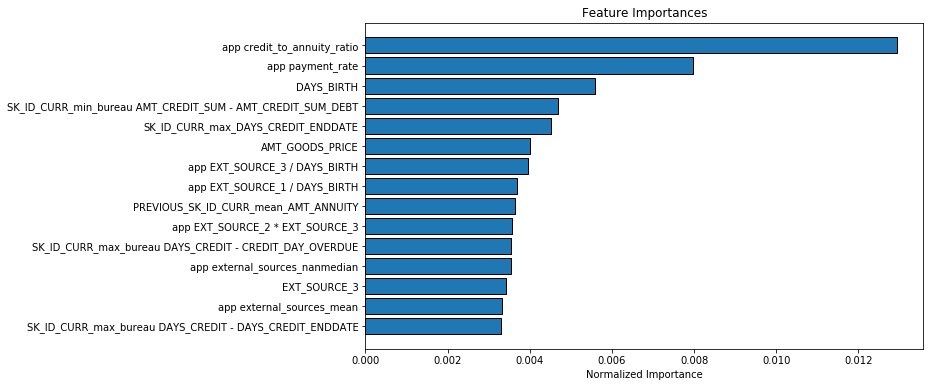

In [18]:
fi_sorted = plot_feature_importances(fi)

In [19]:
valid_pd.to_csv('./model_performance/valid_v4.csv', index = False)

In [21]:
submission.to_csv('./model_performance/v4_pred_{0:.4f}.csv'.format(metrics.iloc[5]['valid']), index = False)